#Below shows the imported libraries and using our google drive to store data images


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install "torch==1.4" "torchvision==0.5.0" #This line can make those warning disapper
from fastai.vision import *
%matplotlib inline

     |████████████████████████████████| 753.4MB 20kB/s 
     |████████████████████████████████| 4.0MB 41.5MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg

In [0]:
path=Path('/content/drive/My Drive/sneakers')

In [0]:
path.ls()

[PosixPath('/content/drive/My Drive/sneakers/.DS_Store'),
 PosixPath('/content/drive/My Drive/sneakers/Adidas sneakers'),
 PosixPath('/content/drive/My Drive/sneakers/Puma sneakers'),
 PosixPath('/content/drive/My Drive/sneakers/Nike sneakers'),
 PosixPath('/content/drive/My Drive/sneakers/models'),
 PosixPath('/content/drive/My Drive/sneakers/export.pkl')]

In [0]:
classes = ['adidas','nike','puma']

In [0]:
np.random.seed()
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['Adidas sneakers', 'Nike sneakers', 'Puma sneakers']

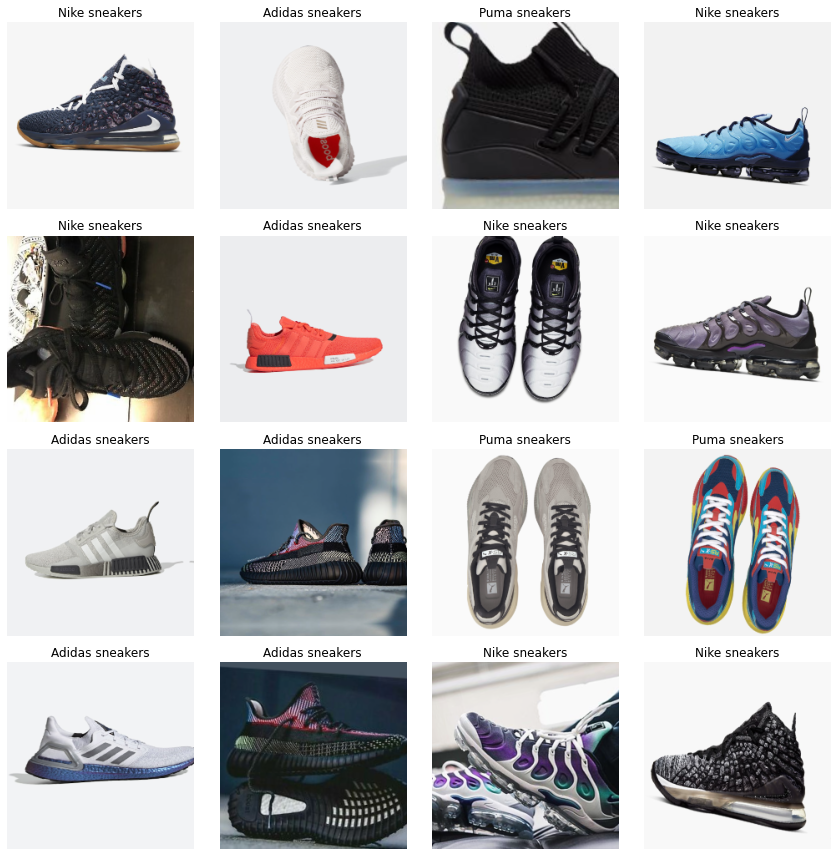

In [0]:
data.show_batch(rows=4, figsize=(12,12))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Adidas sneakers', 'Nike sneakers', 'Puma sneakers'], 3, 400, 100)

In [0]:
learn50 = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
learn50.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.365421,1.459605,0.340000,02:46
1,0.940761,0.969980,0.260000,00:28
2,0.694061,0.483107,0.140000,00:25
3,0.555479,0.355755,0.130000,00:25


In [0]:
learn50.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.98E-06
Min loss divided by 10: 4.79E-07


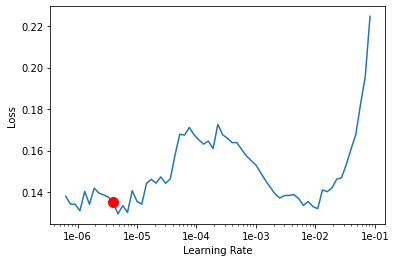

In [0]:
learn50.recorder.plot(suggestion=True)

In [0]:
learn50.fit_one_cycle(4, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.196207,0.333081,0.130000,00:24
1,0.187614,0.328810,0.130000,00:24
2,0.163693,0.337443,0.130000,00:24
3,0.162982,0.328751,0.140000,00:24


In [0]:
learn50.fit_one_cycle(8, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.104349,0.328955,0.140000,00:24
1,0.132338,0.321226,0.140000,00:24
2,0.152140,0.331921,0.130000,00:24
3,0.146529,0.333861,0.130000,00:24
4,0.151944,0.328644,0.130000,00:24
5,0.155590,0.333062,0.120000,00:25
6,0.153075,0.326151,0.130000,00:24
7,0.145832,0.328966,0.120000,00:24


In [0]:
learn50.save('stage-50-1')

In [0]:
learn50.unfreeze()

In [0]:
learn50.fit_one_cycle(12, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.154131,0.329078,0.110000,00:25
1,0.146962,0.319193,0.100000,00:25
2,0.141027,0.314679,0.100000,00:24
3,0.151260,0.300804,0.100000,00:25
4,0.157556,0.282821,0.100000,00:25
5,0.136372,0.263531,0.090000,00:24
6,0.120833,0.244930,0.100000,00:25
7,0.116363,0.237151,0.100000,00:25
8,0.107033,0.232490,0.090000,00:24
9,0.104469,0.235588,0.090000,00:25


In [0]:
learn50.unfreeze()

In [0]:
learn50.fit_one_cycle(16, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.048705,0.244173,0.100000,00:24
1,0.077110,0.235644,0.090000,00:24
2,0.066965,0.234123,0.090000,00:25
3,0.077349,0.235319,0.100000,00:24
4,0.077676,0.241579,0.100000,00:24
5,0.074841,0.236072,0.100000,00:25
6,0.076505,0.242408,0.100000,00:24
7,0.077381,0.240102,0.100000,00:25
8,0.073535,0.236774,0.090000,00:25
9,0.071166,0.226998,0.090000,00:25


In [0]:
learn50.save('stage-50-1-231')

In [0]:
learn50.unfreeze()

In [0]:
interp1 = ClassificationInterpretation.from_learner(learn50)

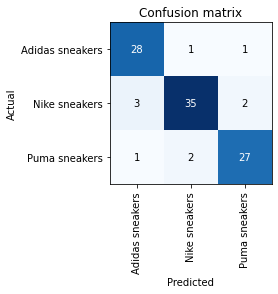

In [0]:
interp1.plot_confusion_matrix()

In [0]:

losses1,idxs1 = interp1.top_losses()
len(data.valid_ds)==len(losses1)==len(idxs1)

True

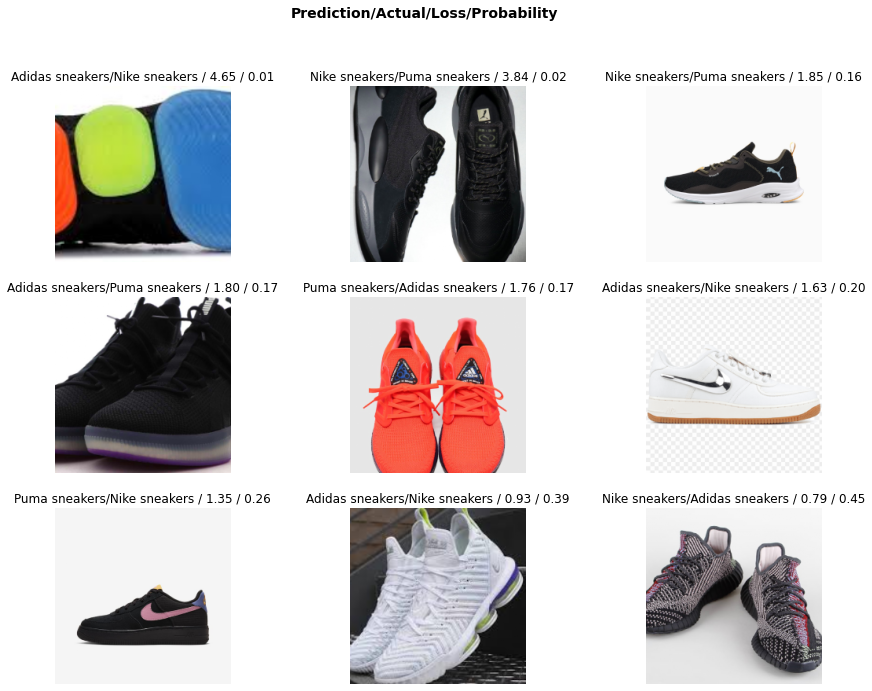

In [0]:
interp1.plot_top_losses(9, figsize=(15,11))

In [0]:
learn50.export()

In [0]:
defaults.device = torch.device('cuda')

In [0]:
learn50new = load_learner(path)

In [0]:
numRight = 0

for x in range(1,101):
  print('=========================================================')
  print('TEST NUMBER: ' + str(x))

  imgK=open_image('/content/drive/My Drive/TEST/test' + str(x) +'.png')
  pred_class,pred_idx,outputs = learn50new.predict(imgK)
  print("prediction: "+str(pred_class))
  if x < 36:
    actual = 'actual: Nike'
  elif 35 < x and x < 68:
    actual = 'actual: Puma'
  else:
    actual = 'actual: Adidas'
  print(actual)
  predi = []
  act = []
  predi = str(pred_class).split(' ')
  act = actual.split(' ')
  if(predi[0]==act[1]):
    numRight+=1
print("Number of shoes correct: " + str(numRight))


TEST NUMBER: 1
prediction: Nike sneakers
actual: Nike
TEST NUMBER: 2
prediction: Nike sneakers
actual: Nike
TEST NUMBER: 3
prediction: Nike sneakers
actual: Nike
TEST NUMBER: 4
prediction: Nike sneakers
actual: Nike
TEST NUMBER: 5
prediction: Nike sneakers
actual: Nike
TEST NUMBER: 6
prediction: Nike sneakers
actual: Nike
TEST NUMBER: 7
prediction: Nike sneakers
actual: Nike
TEST NUMBER: 8
prediction: Nike sneakers
actual: Nike
TEST NUMBER: 9
prediction: Nike sneakers
actual: Nike
TEST NUMBER: 10
prediction: Nike sneakers
actual: Nike
TEST NUMBER: 11
prediction: Nike sneakers
actual: Nike
TEST NUMBER: 12
prediction: Nike sneakers
actual: Nike
TEST NUMBER: 13
prediction: Adidas sneakers
actual: Nike
TEST NUMBER: 14
prediction: Puma sneakers
actual: Nike
TEST NUMBER: 15
prediction: Nike sneakers
actual: Nike
TEST NUMBER: 16
prediction: Nike sneakers
actual: Nike
TEST NUMBER: 17
prediction: Nike sneakers
actual: Nike
TEST NUMBER: 18
prediction: Nike sneakers
actual: Nike
TEST NUMBER: 19
p

prediction : Nike sneakers


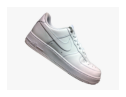

In [0]:
imgK=open_image('/content/drive/My Drive/TEST/test2.png')
pred_class,pred_idx,outputs = learn50new.predict(imgK)
print("prediction : "+str(pred_class))
imgK.show(figsize=(2, 3))


prediction : Nike sneakers


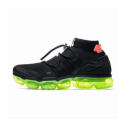

In [0]:
imgK=open_image('/content/drive/My Drive/TEST/test3.png')
pred_class,pred_idx,outputs = learn50new.predict(imgK)
print("prediction : "+str(pred_class))
imgK.show(figsize=(2, 3))

prediction : Nike sneakers


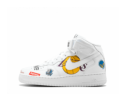

In [0]:
imgK=open_image('/content/drive/My Drive/TEST/test5.png')
pred_class,pred_idx,outputs = learn50new.predict(imgK)
print("prediction : "+str(pred_class))
imgK.show(figsize=(2, 3))

prediction : Nike sneakers


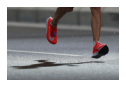

In [0]:
imgK=open_image('/content/drive/My Drive/TEST/test7.png')
pred_class,pred_idx,outputs = learn50new.predict(imgK)
print("prediction : "+str(pred_class))
imgK.show(figsize=(2, 3))

prediction : Nike sneakers


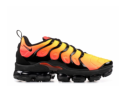

In [0]:
imgK=open_image('/content/drive/My Drive/TEST/test8.png')
pred_class,pred_idx,outputs = learn50new.predict(imgK)
print("prediction : "+str(pred_class))
imgK.show(figsize=(2, 3))

prediction : Nike sneakers


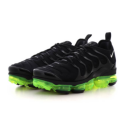

In [0]:
imgK=open_image('/content/drive/My Drive/TEST/test9.png')
pred_class,pred_idx,outputs = learn50new.predict(imgK)
print("prediction : "+str(pred_class))
imgK.show(figsize=(2, 3))

prediction : Nike sneakers


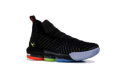

In [0]:
imgK=open_image('/content/drive/My Drive/TEST/test11.png')
pred_class,pred_idx,outputs = learn50new.predict(imgK)
print("prediction : "+str(pred_class))
imgK.show(figsize=(2, 3))

prediction : Puma sneakers


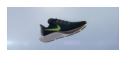

In [0]:
imgK=open_image('/content/drive/My Drive/TEST/test14.png')
pred_class,pred_idx,outputs = learn50new.predict(imgK)
print("prediction : "+str(pred_class))
imgK.show(figsize=(2, 3))

prediction : Nike sneakers


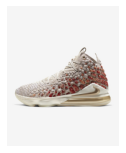

In [0]:
imgK=open_image('/content/drive/My Drive/TEST/test15.png')
pred_class,pred_idx,outputs = learn50new.predict(imgK)
print("prediction : "+str(pred_class))
imgK.show(figsize=(2, 3))

prediction : Nike sneakers


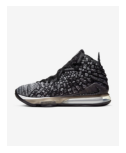

In [0]:
imgK=open_image('/content/drive/My Drive/TEST/test19.png')
pred_class,pred_idx,outputs = learn50new.predict(imgK)
print("prediction : "+str(pred_class))
imgK.show(figsize=(2, 3))

# Currently model has an accuracy of 92%.